<a href="https://colab.research.google.com/github/Linda-Agesa/Predicting-Individual-Bank-Account-Owners/blob/master/Financial_Inclusion_Analysis_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Financial Inclusion in East African Countries

##Context of the Research

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

##Problem Statement

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



In order to work on the above problem, we need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Plot univariate and bivariate summaries recording your observations.
4. Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.
5. Challenge your solution by providing insights on how you can make improvements.

## Hypothesis Statements

It is popular belief that the population with a higher  level of education have a greater likelihood of seeking financial services from banks than people with no educationa background or little educational experience.

According to the repository linked below,  a person with a higher level of education has a better level of understanding of banking products and services, they are able to communicate their needs to their service providers or may have higher levels of income all which would drive a person to seek financial services from a bank, the more likely they are to have a bank account. 

(http://erepository.uonbi.ac.ke/bitstream/handle/11295/89872/Maina_Factors%20influencing%20uptake%20of%20banking%20services%20in%20rural%20centers%20for%20Agricultural%20development.pdf?sequence=3) 

We seek to test this notion and determine whether the level of education a person obtains is signicant in determining whether or not they own and use a bank account.



---



#### Null Hypothesis
 
H0 : Level of Education   =   Significant

#### Alternative Hypothesis

H1 : Level of education   !=   Significant



---



##Research Question

> What are the demographic factors help to determine whether an individual has or uses a bank account or not?

   +  Here we test the variables that are signicant either negatively or positevely in  determining their relationship with dependent variable ('Has a bank account or not'). 

## Metrics for Success

> To determine the factors that determine the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda. 

> To design a model with an 88% effeciency in its prediction of individuals who have/ do not have bank accounts.

## Experimental Design

#### True Experimental Research Design
- This is the methodology we will to use for this research experiment.

- A true experiment research design is a type of experimental design used to test and reject or fail to reject a hypothesis by using statistical analysis as the means of investigation. This type of experiment can also be used to determine cause and effect relationships within groups.

- The following are the assumptions that must be satisfied in order to use the true experiment research design :

    -  Control group and experimental group
    -  Researcher - manipulated variable(s)
    -  Random distribution

## Appropriateness of Available Data

- The data contains demographic information and the financial services used by individuals across East Africa. 

- The data is contains the information needed for investigation to answer our research question.

### Loading libraries and files to our Environment

In [0]:
# Loading the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [472]:
# Loading the decription table
# This contains the description of the variables in our dataframe

description_df = pd.read_csv('http://bit.ly/VariableDefinitions')

description_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [0]:
#We will now load the dataset to our environment

financial_df = pd.read_csv('http://bit.ly/FinancialDataset')



##Data Understanding and Data Cleaning

In [474]:
# Display the contents of the first five records in the dataset

financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [475]:
# Displaying the last five components in of our data

financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [476]:
# Using the info() function to investigate some of the features contained in our dataset.

financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


- The cell above displays some information about our data such as  such as the number non null of rows in each column,   columns contained in our dataframe, the data types of the columns and the memory usage

### Checking and Deleting Duplicate Records

In [477]:
# Checking the shape of the dataframe

financial_df.shape

(23524, 13)

In [478]:
# We now check for duplicated records

financial_df.duplicated(keep = 'first') == True

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23494    False
23495    False
23496    False
23497    False
23498    False
23499    False
23500    False
23501    False
23502    False
23503    False
23504    False
23505    False
23506    False
23507    False
23508    False
23509    False
23510    False
23511    False
23512    False
23513    False
23514    False
23515    False
23516    False
23517    False
23518    False
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [0]:
# Dropping the duplicates 

financial_df = financial_df.drop_duplicates()

In [480]:
# Checking the shape of the dataframe after dropping duplicate values

financial_df.shape

(23524, 13)

- There is no difference in shape, the dataframe contained to duplicates.

### Dealing with Our Columns

In [481]:
# Checking the column names of our dataframe

financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [482]:
# Renaming columns

financial_df.columns = financial_df.columns.str.lower().str.replace(' ', '_').str.replace('relathip', 'relationship').str.replace('educuation', 'education')

financial_df.columns


Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

- The line of code above is used to lower all the letters in the column names and replaces the spaces between the column names with an underscore.
- We achieve uniformity of column names by renaming the columns.

In [0]:
financial_df.drop('uniqueid', axis = 1, inplace = True )

In [484]:
financial_df.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


### Checking and Dealing with Missing Values

> Using the isnull() function, we will check the sum of null values in each row. We will then use the dropna() function to drop the rows of missing values.



In [485]:
# Let's check for null records in our dataset

financial_df.isnull().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

- Here we see the number of missing values in each column

In [0]:
#dropping the rows with missing values

fin_df = financial_df.dropna()

In [487]:
# Checking the shape of the dataframe after dropping the rows with missing values

financial_df.shape[0] - fin_df.shape[0]

181

- 181 rows have been dropped after getting rid of the missing values.

### Outliers - Identifying and Dealing with Outliers

We will use box plots to identify outliers to check for outliers in the columns with numerical entries.


#### Year Column

In [488]:
# Let us identify the unique entries in this column

fin_df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

- We see that the years included are 2016, 2017, 2018, 2039,2056.

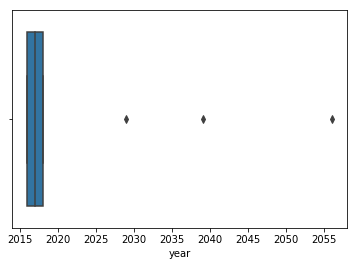

In [489]:
# Plotting a boxplot using the seaborn library to get a visual representation of the data

sns.boxplot(x = 'year', data = fin_df)

- The boxplot shows that the years 2029, 2039,2056 are clearly outliers and each year contains only one entry.

In [490]:
fin_df = fin_df[~((fin_df.year == 2029) | (fin_df.year == 2039) | (fin_df.year == 2056 ))]

fin_df.year.unique()

array([2018, 2016, 2017])

- The entries with the years that are not in the average range of our study have been deleted. We use the unique() function to confirm that they have been removed.

In [491]:
#reindexing for uniformity

fin_df.reindex(axis = 0)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


#### Age of the Respondents and Household Size Columns

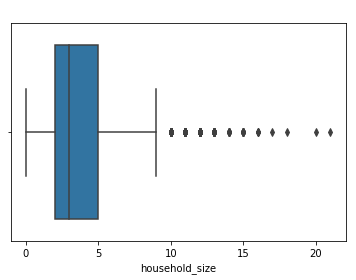

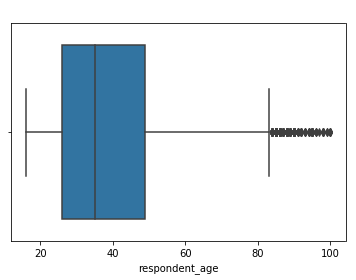

In [492]:
sns.boxplot(fin_df[ 'household_size'])

plt.title('Boxplot of the Household Size', color = 'white', fontsize = 14) 
plt.show()

sns.boxplot(fin_df[ 'respondent_age'])

plt.title('Boxplot of the Age of the Respondents', color = 'white', fontsize = 14)
plt.show()

- In the respondents age and household size columns, removal of the outlier will negatively affect our analysis as the there too many outliers to deal with.

## Univariate EDA

> This is the descriptive analysis of a single variable. It involves the analysis of the following characteristics:
  - Frequency Distribution
  - Measures of Central Tendencies i.e. mean, median and mode
  - Measures of Dispersion such as range, variance , standard deviation

In [493]:
# Using the describe() funtion to univariate analysis

fin_df.describe()

,year,household_size,respondent_age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [494]:
fin_df.head(2)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


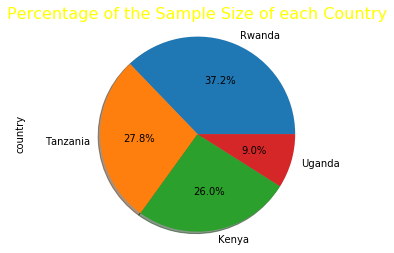

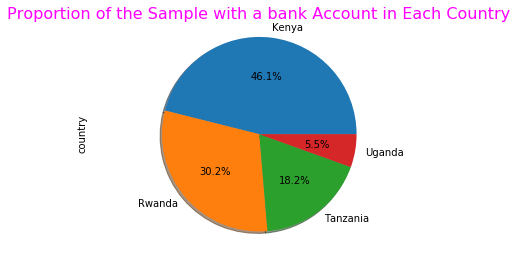

In [495]:
# Plotting pie charts to visualize the country categorical data

population_df= fin_df.country.value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.title('Percentage of the Sample Size of each Country', color = 'yellow', fontsize = 16)
plt.show()


count_df = fin_df.country[fin_df['has_a_bank_account'] == 'Yes'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)

plt.axis('equal')
plt.title('Proportion of the Sample with a bank Account in Each Country', color = 'magenta', fontsize = 16)
plt.show()




- Rwanda had the highest number of people sampled at 37.2% while Uganda had the least with Uganda with the least number of people at 9% of the sample space.

- Kenya has the highest number of people with bank accounts at 46.1% while Uganda has the least number of people having bank accounts at 5.5%  

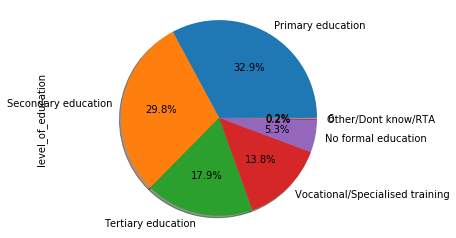

In [496]:
# visualizing the number of people with bank accounts according to their level of Education

ed_df = fin_df.level_of_education[fin_df['has_a_bank_account'] == 'Yes'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True)

plt.axis('equal')
plt.title('', color = 'white', fontsize = 16)
plt.show()


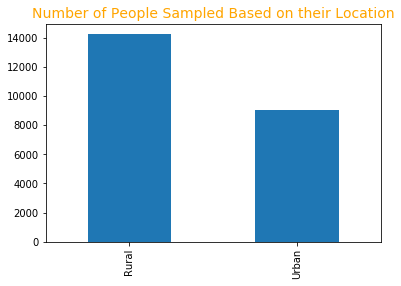

In [497]:
loc_df = fin_df.type_of_location.value_counts().plot.bar()

plt.title('Number of People Sampled Based on their Location', color = 'orange', fontsize = 14)

plt.show()

- A higher percentage of the people sampled reside in the rural parts of their countries.

## Bivariate EDA



In [498]:
# Finding the correlation between variables

corr_df = fin_df.corr()

corr_df

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


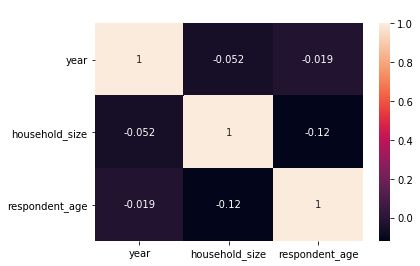

In [499]:
#representing the correlation visually on a heatmap, we have:

sns.heatmap(corr_df, annot = True)

plt.title('Correlation between Different Numerical Data', color = 'white', fontsize = 14)

plt.show()


- From the above heatmap, there is no correlation between the numerical data provided.

####Hypothesis Testing

We will not test the following hypothesis:

#####Null Hypothesis

H0 : Level of Education = Significant

#####Alternative Hypothesis
H1 : Level of education != Significant




In [500]:
H = pd.get_dummies(fin_df.level_of_education)

p = pd.get_dummies(fin_df.has_a_bank_account)

H.tail()

,6,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
23519,0,1,0,0,0,0,0
23520,0,0,0,0,1,0,0
23521,0,0,0,1,0,0,0
23522,0,0,0,0,1,0,0
23523,0,0,0,0,1,0,0


In [501]:
from scipy import stats

Z = stats.zscore(H)

Z

array([[-0.03403163, -0.48650522, -0.01851693, ...,  2.13288898,
        -0.22692167, -0.18851631],
       [-0.03403163,  2.05547639, -0.01851693, ..., -0.46884766,
        -0.22692167, -0.18851631],
       [-0.03403163, -0.48650522, -0.01851693, ..., -0.46884766,
        -0.22692167,  5.30458074],
       ...,
       [-0.03403163, -0.48650522, -0.01851693, ..., -0.46884766,
        -0.22692167, -0.18851631],
       [-0.03403163, -0.48650522, -0.01851693, ...,  2.13288898,
        -0.22692167, -0.18851631],
       [-0.03403163, -0.48650522, -0.01851693, ...,  2.13288898,
        -0.22692167, -0.18851631]])

Text(0.5, 1.0, 'Heatmap of Z Scores')

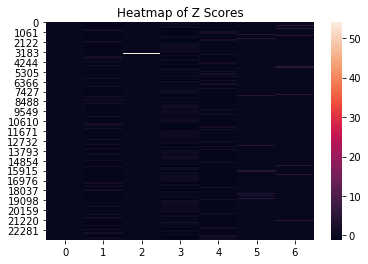

In [502]:
sns.heatmap(Z)

plt.title('Heatmap of Z Scores')

- the level of education attained is not significant in determining if a person has a bank account or not.

## Modeling / Implementing the Solution

In [503]:
fin_df.head(1)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


#### Defining the X and Y variables

> We need to define our dependent(outcome variable) an independent(predictor) variables before analysis so that we obtain the predictor variables that are presumed to cause the differences in variable out comes and the out come variable which is the outcome that our research is studying

In [0]:
X = fin_df.drop('has_a_bank_account', axis = 1)
Y = fin_df['has_a_bank_account']

In [505]:
X.head(2)

,country,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [506]:
Y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

- We have defined our independent variable X and our dependent variable Y 

In [507]:
# using the get_dummies() function to turn categorical data to numerical data
X = pd.get_dummies(X)

X.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


- We have assigned dummy values to the variables that contain categorical data to enable us to fit a model in our analysis.

#### Split the Data into Training and Test sets

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)

- We have split our data into control group(test set) and experimental group(train set)

#### Standardizing the data

> Standardization is an important step as it scales the values of the variables with an aim of balancing the variance of variable to avoid bias of the model in analysis.

> This procedure is regarded as a pre-processing step.

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Dimension Reduction

> We will use the PCA method to reduce the number of dimensions of our data before we fit an appropriate model.

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [0]:
# We now pply the number of components we desire to the PCA() function for reduction

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

- We have chosen to reduce the number of components of our data to 10.

#### Fitting a Model

> We will use a linear logistic regression model for our analysis as we want to predict the probability  of either one of two outcomes.

In [512]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test) 

#### Deternining the Accuracy of our Model

>  We use the accuracy matrix to determine the number of predictions that were spot on and those that we failed to predict.

> The accuracy score function shows us the probability of the accuracy of our model predictions.

In [514]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[5932  114]
 [ 725  231]]
0.8801770922593545


## Challenging the Solution

In [0]:
# Heatmap to determine the correlation of components

Q = pd.get_dummies(fin_df)



#sns.heatmap(Q)

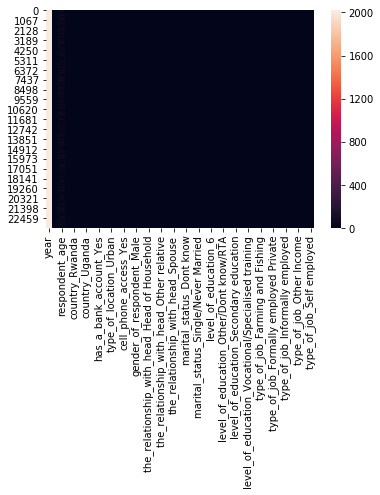

In [516]:
sns.heatmap(Q)

- There is no correlation 

#### Testing the accuracy when using each of the number of components

> We use a for loop to iterate through the length of the columns to test the accuracy of each of the number of components.

In [517]:
import warnings
warnings.filterwarnings("ignore")

accuracy = {}

for i in range(1, len(X.columns) + 1):
  from sklearn.model_selection import train_test_split

  X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 13)


  from sklearn.preprocessing import StandardScaler

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  from sklearn.decomposition import PCA

  pca = PCA(n_components= i)
  X_train = pca.fit_transform(X_train)
  X_test = pca.fit_transform(X_test)

  from sklearn.linear_model import LogisticRegression

  classifier = LogisticRegression()
  classifier.fit(X_train, Y_train)

  y_pred = classifier.predict(X_test) 

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score

  cm = confusion_matrix(Y_test, y_pred)
  acc = accuracy_score(Y_test, y_pred)
  
  accuracy.update({'ncomponents: '+ str(i) : 'accuracy: ' + str(acc*100)})

accuracy

{'ncomponents: 1': 'accuracy: 86.34675806912311',
 'ncomponents: 10': 'accuracy: 88.21765209940017',
 'ncomponents: 11': 'accuracy: 88.20337046558126',
 'ncomponents: 12': 'accuracy: 88.04627249357327',
 'ncomponents: 13': 'accuracy: 88.20337046558126',
 'ncomponents: 14': 'accuracy: 88.31762353613254',
 'ncomponents: 15': 'accuracy: 87.93201942302198',
 'ncomponents: 16': 'accuracy: 88.10339902884891',
 'ncomponents: 17': 'accuracy: 88.11768066266781',
 'ncomponents: 18': 'accuracy: 88.11768066266781',
 'ncomponents: 19': 'accuracy: 87.98914595829763',
 'ncomponents: 2': 'accuracy: 86.34675806912311',
 'ncomponents: 20': 'accuracy: 88.06055412739218',
 'ncomponents: 21': 'accuracy: 87.88917452156527',
 'ncomponents: 22': 'accuracy: 87.93201942302198',
 'ncomponents: 23': 'accuracy: 87.68923164810055',
 'ncomponents: 24': 'accuracy: 87.76063981719508',
 'ncomponents: 25': 'accuracy: 87.56069694373036',
 'ncomponents: 26': 'accuracy: 86.93230505569836',
 'ncomponents: 27': 'accuracy: 87

- A logistic regression model with with 8 number of components produces the highest results with the highest accuracy.